<a href="https://colab.research.google.com/github/FelipePascual/Proyecto-Final-ML-Juan-Aristizabal/blob/main/Proyecto_Final_ML_Juan_Aristizabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset cargado correctamente.


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

None


Resumen estadístico:


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,NaN,NaN,NaN,NaN,NaN,NaN



Valores nulos por columna:


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


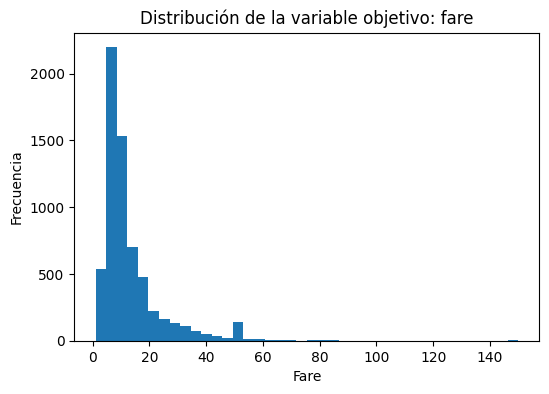


===== Resultados: Regresión Lineal =====
R² :  0.8861
MAE:  1.8762
MSE:  12.3924

===== Resultados: Árbol de Decisión =====
R² :  0.8838
MAE:  2.0138
MSE:  12.6424


=== Comparación de Modelos ===


,modelo,r2,mae,mse
0,Regresión Lineal,0.886065,1.876151,12.392406
1,Árbol de Decisión,0.883766,2.013786,12.642450



Proceso completado. Para la etapa de Deployment, este notebook debe subirse a un repositorio (GitHub).


In [1]:
# ============================================================
# PROYECTO FINAL - MODELO SUPERVISADO CON EL DATASET "taxis"
# ============================================================
# CRISP-DM:
# 1. Business Understanding  (en documento Word)
# 2. Data Understanding
# 3. Data Preparation I y II
# 4. Modeling
# 5. Evaluation
# 6. Deployment (conceptual en Word)
# ============================================================

# ---------------------------
# 0. Importar Librerías
# ---------------------------
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------
# 1. Cargar Dataset
# ---------------------------
taxis = sns.load_dataset("taxis")
print("Dataset cargado correctamente.")
display(taxis.head())
display(taxis.info())

# ---------------------------
# 2. Exploración Inicial
# ---------------------------

print("\nResumen estadístico:")
display(taxis.describe(include="all"))

print("\nValores nulos por columna:")
display(taxis.isna().sum())

# Visualización del comportamiento de la variable objetivo (fare)
plt.figure(figsize=(6,4))
plt.hist(taxis["fare"], bins=40)
plt.title("Distribución de la variable objetivo: fare")
plt.xlabel("Fare")
plt.ylabel("Frecuencia")
plt.show()

# Eliminación de filas evidentemente corruptas (fares negativos o distancias negativas)
taxis = taxis[(taxis["fare"] > 0) & (taxis["distance"] > 0)]

# ---------------------------
# 3. Preparación de Datos (Parte I)
# ---------------------------

# Imputación simple de nulos (si aparece alguno adicional)
taxis = taxis.fillna({
    "pickup_zone": "Unknown",
    "dropoff_zone": "Unknown",
    "payment": "Unknown"
})

# ---------------------------
# 3. Preparación de Datos (Parte II)
# ---------------------------

# Variable objetivo seleccionada:
target = "fare"

# Variables predictoras seleccionadas:
features = ["distance", "pickup_zone", "dropoff_zone", "payment"]

X = taxis[features]
y = taxis[target]

# Separar columnas por tipo
num_features = ["distance"]
cat_features = ["pickup_zone", "dropoff_zone", "payment"]

# Preprocesador completo: escalamiento + codificación
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

# ---------------------------
# 4. Modelado
# ---------------------------

# Modelo 1: Regresión Lineal
pipeline_lr = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

# Modelo 2: Árbol de Decisión
pipeline_dt = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenamiento
pipeline_lr.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

# ---------------------------
# 5. Evaluación
# ---------------------------

def evaluar_modelo(nombre, modelo, X_test, y_test):
    pred = modelo.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)

    print(f"\n===== Resultados: {nombre} =====")
    print(f"R² :  {r2:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")

    return {"modelo": nombre, "r2": r2, "mae": mae, "mse": mse}

result_lr = evaluar_modelo("Regresión Lineal", pipeline_lr, X_test, y_test)
result_dt = evaluar_modelo("Árbol de Decisión", pipeline_dt, X_test, y_test)

# Comparación final
df_resultados = pd.DataFrame([result_lr, result_dt])
print("\n\n=== Comparación de Modelos ===")
display(df_resultados.sort_values("r2", ascending=False))

# ---------------------------
# 6. Exportación a repositorio (Deployment conceptual en Word)
# ---------------------------
print("\nProceso completado. Para la etapa de Deployment, este notebook debe subirse a un repositorio (GitHub).")
